# Регресія на головні компоненти

## Yuriy Ryzkin

### Варіант 4

In [31]:
library(Metrics)

In [2]:
path_to_folder <- paste(dirname(getwd()),'/lab1/data',sep = '')
filenames = list.files(path = path_to_folder,full.names = TRUE)

In [3]:
#create list with dataframes from /data folder
datalist = lapply(filenames,
                  function (x){
                      a <- unlist(strsplit(x,'[_.]'));
                      company <- a[length(a)-1];
                      x0<- read.csv(x,header = F)[,c(1,6)];# using ol
                      colnames(x0)<-c('date',company);
                      x0;
                  })
#merge tables to one
y<-Reduce(function(x,y) {merge(x,y,by="date")}, datalist)

In [4]:
df<-y[-nrow(y),-1]
df$tomorrow_apd <- y$apd[-1]
number_rows<-nrow(df)

head(df)

,amgn,amp,amt,amzn,an,anf,aon,apa,apc,apd,tomorrow_apd
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,76.6332,29.6218,24.1784,45.99,19.86,44.4525,28.5404,70.9727,45.7598,46.0207,46.3674
2,77.1332,29.2406,24.0615,44.90,19.82,43.6285,28.6119,67.7776,43.4416,46.3674,45.0466
3,75.1332,29.0327,23.4377,44.47,19.50,43.2032,28.8173,65.2821,42.0754,45.0466,44.7825
4,72.9025,28.9114,23.3305,44.03,19.30,45.8170,28.3797,62.0681,41.9374,44.7825,45.3108
5,74.0948,29.0240,23.5547,43.66,19.29,46.1359,28.4154,62.8432,42.7276,45.3108,44.8073
6,73.8929,28.6428,23.0772,43.78,19.21,45.2056,27.9508,62.4178,42.4134,44.8073,44.6422


In [6]:
data_test <- df[(number_rows-19):number_rows,]
data_model1 <- df[0:(number_rows-20),]
data_model2 <- df[(number_rows-69):(number_rows-20),]

Минулого разу ми прогнозували ціну tomorrow_apd використовуючи всі інші дані. Цього разу прогнозувати будемо ту ж змінну

In [7]:
head(data_model1[,1:9])

,amgn,amp,amt,amzn,an,anf,aon,apa,apc
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,76.6332,29.6218,24.1784,45.99,19.86,44.4525,28.5404,70.9727,45.7598
2,77.1332,29.2406,24.0615,44.90,19.82,43.6285,28.6119,67.7776,43.4416
3,75.1332,29.0327,23.4377,44.47,19.50,43.2032,28.8173,65.2821,42.0754
4,72.9025,28.9114,23.3305,44.03,19.30,45.8170,28.3797,62.0681,41.9374
5,74.0948,29.0240,23.5547,43.66,19.29,46.1359,28.4154,62.8432,42.7276
6,73.8929,28.6428,23.0772,43.78,19.21,45.2056,27.9508,62.4178,42.4134


Беремо всі дані без даних за сьогоднішу ціну прогнозованої компанії, а також без вчорашнього. Поміщаємо це в X_train. Y_train - це те, що ми хочемо спрогнозувати

In [8]:
data_model1_X_train <- data_model1[,1:9]
data_model2_X_train <- data_model2[,1:9]
data_model1_Y_train <- data_model1[,11]
data_model2_Y_train <- data_model2[,11]

In [9]:
PC_1 <- princomp(data_model1_X_train,cor =  T)
summary(PC_1)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     2.3338095 1.2753232 1.1042033 0.5091125 0.42736009
Proportion of Variance 0.6051852 0.1807166 0.1354739 0.0287995 0.02029296
Cumulative Proportion  0.6051852 0.7859018 0.9213757 0.9501752 0.97046814
                           Comp.6      Comp.7      Comp.8      Comp.9
Standard deviation     0.34661860 0.244554450 0.232846653 0.177814149
Proportion of Variance 0.01334938 0.006645209 0.006024174 0.003513097
Cumulative Proportion  0.98381752 0.990462729 0.996486903 1.000000000

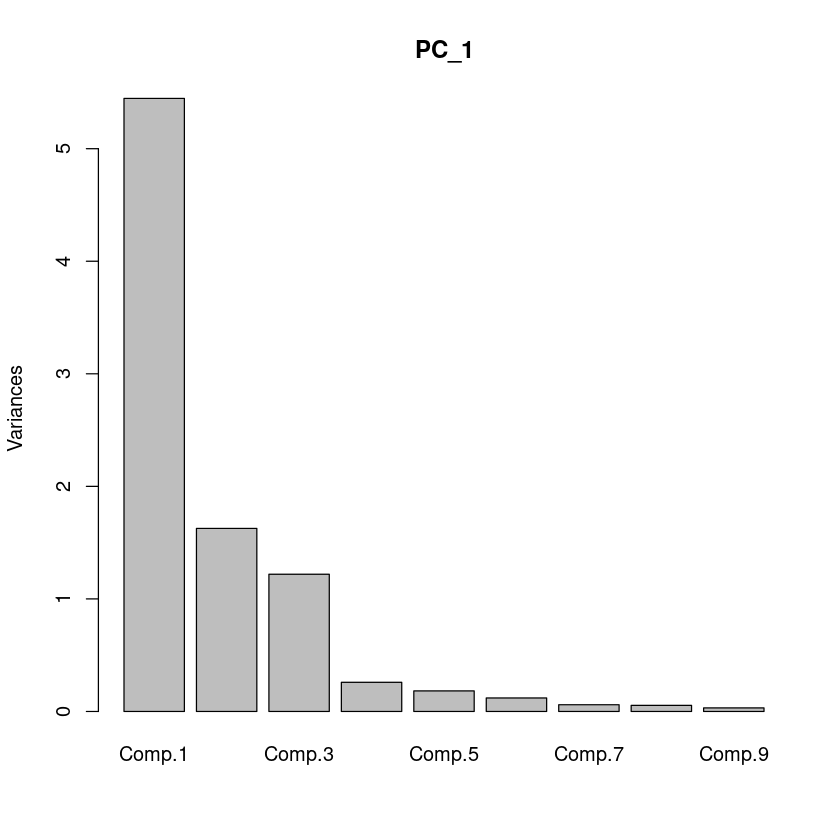

In [10]:
plot(PC_1)

In [11]:
PC_2 <- princomp(data_model2_X_train,cor =  T)
summary(PC_2)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     1.9706957 1.8174491 0.82283239 0.73265507 0.53669983
Proportion of Variance 0.4315157 0.3670135 0.07522813 0.05964261 0.03200519
Cumulative Proportion  0.4315157 0.7985292 0.87375736 0.93339997 0.96540516
                           Comp.6      Comp.7      Comp.8      Comp.9
Standard deviation     0.37925394 0.271733883 0.222747023 0.209915463
Proportion of Variance 0.01598151 0.008204367 0.005512915 0.004896056
Cumulative Proportion  0.98138666 0.989591029 0.995103944 1.000000000

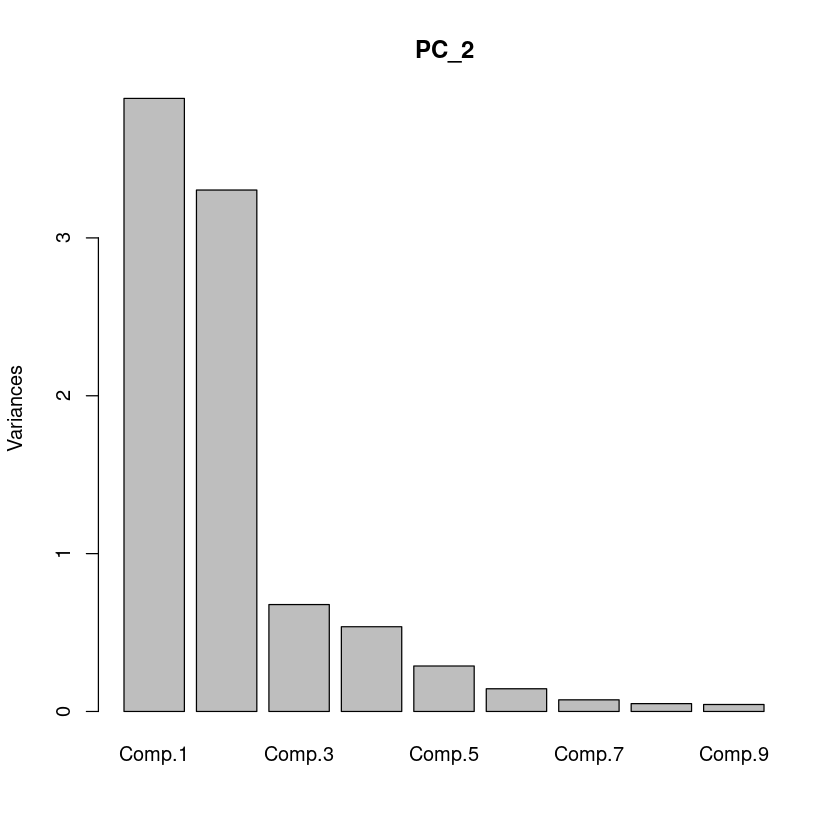

In [12]:
plot(PC_2)

In [13]:
loadings(PC_2)


Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
amgn  0.444  0.113  0.161  0.426         0.692         0.285       
amp         -0.538                       0.145  0.176 -0.314  0.744
amt   0.457  0.184  0.227               -0.120  0.345 -0.730 -0.189
amzn -0.236 -0.425 -0.343  0.248 -0.408  0.232  0.350        -0.487
an    0.385 -0.148 -0.513 -0.504  0.201  0.316 -0.336 -0.155 -0.189
anf   0.438         0.108 -0.337 -0.714 -0.163         0.335  0.146
aon   0.221 -0.438  0.203  0.445        -0.222 -0.657 -0.121 -0.134
apa  -0.166 -0.370  0.688 -0.432  0.160  0.264               -0.278
apc   0.346 -0.351 -0.111         0.491 -0.432  0.408  0.361 -0.124

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.111  0.111  0.111  0.111  0.111  0.111  0.111  0.111  0.111
Cumulative Var  0.111  0.222  0.333  0.444  0.556  0.667  0.778  0.889  1.

Судячи з даних варто спробувати використати регресію на 4 компоненти

In [95]:
data1 <- data.frame(PC_1$scores)

colnames(data1) <- c('first','second','third','forth','5','6','7','8','9')

model_1 <- lm(data_model1_Y_train~first+second+third+forth,data = data1)
model_1


Call:
lm(formula = data_model1_Y_train ~ first + second + third + forth, 
    data = data1)

Coefficients:
(Intercept)        first       second        third        forth  
    71.0899       4.6994      -5.1897       0.2137       1.8452  


In [96]:
data2 <- data.frame(PC_2$scores)

colnames(data2) <- c('first','second','third','forth','5','6','7','8','9')

model_2 <- lm(data_model2_Y_train~first+second+third+forth,data = data2)
summary(model_2)


Call:
lm(formula = data_model2_Y_train ~ first + second + third + forth, 
    data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4466 -0.6928  0.1935  0.9794  2.6969 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 93.23147    0.19448 479.388  < 2e-16 ***
first       -0.23926    0.09869  -2.424   0.0194 *  
second      -0.87379    0.10701  -8.166 1.98e-10 ***
third        0.19166    0.23635   0.811   0.4217    
forth       -0.30520    0.26545  -1.150   0.2563    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.375 on 45 degrees of freedom
Multiple R-squared:  0.6235,	Adjusted R-squared:  0.5901 
F-statistic: 18.63 on 4 and 45 DF,  p-value: 4.271e-09


Беремо найкращу модель з минулої лабораторної

In [63]:
model_yesterday <-lm(tomorrow_apd~apd,data=df[(number_rows-50):number_rows,])
summary(model_yesterday)


Call:
lm(formula = tomorrow_apd ~ apd, data = df[(number_rows - 50):number_rows, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0942 -0.5212 -0.0511  0.3741  6.3387 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.99613    4.11481   0.485     0.63    
apd          0.98205    0.04219  23.276   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.57 on 49 degrees of freedom
Multiple R-squared:  0.9171,	Adjusted R-squared:  0.9154 
F-statistic: 541.8 on 1 and 49 DF,  p-value: < 2.2e-16


In [97]:
y_pred <- data_test$tomorrow_apd
PC_test <- princomp(data_test[,1:9],cor =  T)
data_X_test <- data.frame(PC_test$scores)
rownames(data_X_test) <- 1:nrow(data_X_test)
colnames(data_X_test) <- c('first','second','third','forth','5','6','7','8','9')

Нижче код для того, щоб оцінити розміри для графіку

In [54]:
max(resi_1)
min(resi_1)
max(resi_2)
min(resi_2)

[1] 52.7077

[1] 20.08664

[1] 15.95323

[1] 0.8795972

Оцінюємо успішність метрик за допомогою метрик mae та mse

In [119]:
cat('MAE:\nPC_1: ',mae(y_pred,predict(model_1,data_X_test)),
     '\nPC_2 :',mae(y_pred,predict(model_2,data_X_test)),
   '\nmodel_yesterday',mae(y_pred,predict(model_yesterday,data_test)),
   '\nmodel_all',mae(y_pred,predict(model_all,data_test)))


cat('\nMSE:\nPC_1:',mse(y_pred,predict(model_1,data_X_test)),
     '\nPC_2 :',mse(y_pred,predict(model_2,data_X_test)),
   '\nmodel_yesterday',mse(y_pred,predict(model_yesterday,data_test)),
   '\nmodel_all',mse(y_pred,predict(model_all,data_test)))


MAE:
PC_1:  31.92864 
PC_2 : 9.787028 
model_yesterday 1.188752 
model_all 1.175244
MSE:
PC_1: 1101.143 
PC_2 : 120.3974 
model_yesterday 3.674371 
model_all 3.466081

Ми можемо побачити, що наша регресія, що побудована на перших чотирьох компонентах і близько не стоїть поруч з звичайною регресією з минулої лабораторної (model_yesterday)  

Також з найкращою моделі на компоненти спробуємо використати лише значущі компаненти

In [75]:
model_2_signif <- lm(data_model2_Y_train~first+second,data = data2)
summary(model_2_signif)


Call:
lm(formula = data_model2_Y_train ~ first + second, data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6677 -0.7753  0.2781  0.8904  2.4483 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 93.23147    0.19444 479.492  < 2e-16 ***
first       -0.23926    0.09866  -2.425   0.0192 *  
second      -0.87379    0.10698  -8.167 1.43e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.375 on 47 degrees of freedom
Multiple R-squared:  0.607,	Adjusted R-squared:  0.5903 
F-statistic: 36.29 on 2 and 47 DF,  p-value: 2.942e-10


Намалюємо всі наші моделі. По х номер прогнозованої змінної. По Y різниця між тестовою  величиною і прогнозованою

In [99]:
model_all <-lm(tomorrow_apd~.-tomorrow_apd-apd,data=df[(number_rows-50):number_rows,])
summary(model_all)


Call:
lm(formula = tomorrow_apd ~ . - tomorrow_apd - apd, data = df[(number_rows - 
    50):number_rows, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4701 -0.9844 -0.2693  1.2882  6.7459 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 94.76930   28.01091   3.383 0.001586 ** 
amgn         0.50324    0.14089   3.572 0.000923 ***
amp          1.93001    0.44679   4.320 9.68e-05 ***
amt         -0.14082    0.20870  -0.675 0.503606    
amzn        -0.07957    0.04901  -1.623 0.112171    
an          -0.15408    0.41761  -0.369 0.714062    
anf         -0.10216    0.32151  -0.318 0.752286    
aon         -1.36207    0.57489  -2.369 0.022615 *  
apa         -0.15864    0.23441  -0.677 0.502359    
apc         -0.70754    0.31802  -2.225 0.031656 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.926 on 41 degrees of freedom
Multiple R-squared:  0.8955,	Adjusted R-squared:  0.8725 
F-statistic: 39.0

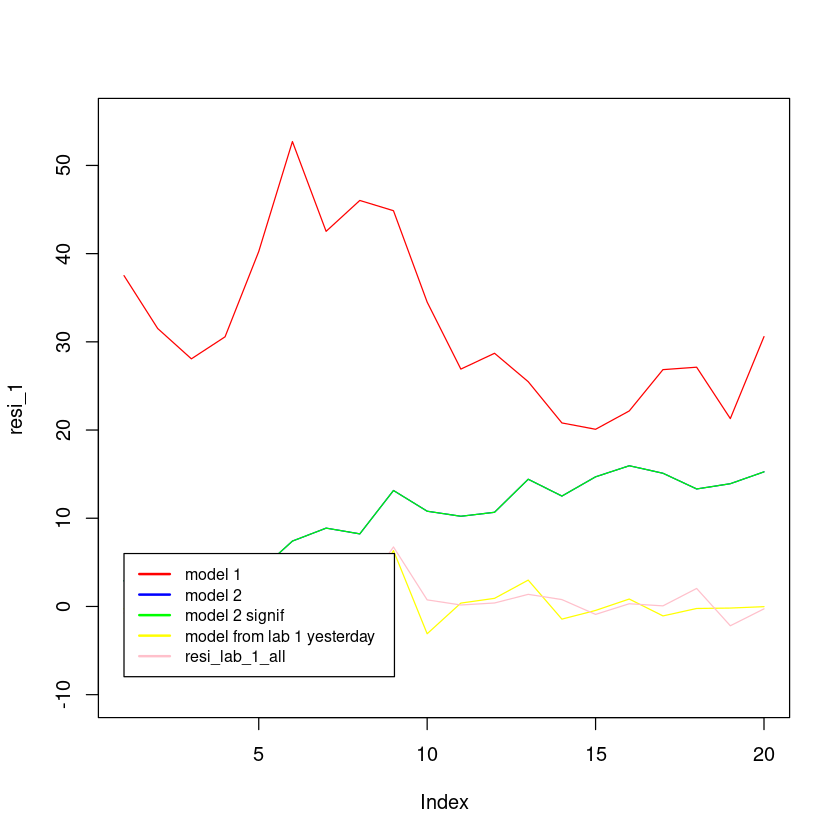

In [111]:
resi_1 <-y_pred-predict(model_1,data_X_test)
resi_2 <-y_pred-predict(model_2,data_X_test)
resi_2_signif <- y_pred-predict(model_2,data_X_test)
resi_lab_1 <- y_pred-predict(model_yesterday,data_test)
resi_lab_1_all <- y_pred-predict(model_all,data_test)
plot(resi_1,type="l",col="red",ylim = c(-10,55))
lines(resi_2,col="blue")
lines(resi_2_signif,col="green")
lines(resi_lab_1,col="yellow")
lines(resi_lab_1_all,col="pink")
legend(1, 6, legend=c("model 1", "model 2","model 2 signif",'model from lab 1 yesterday','resi_lab_1_all'),
       col=c("red", "blue","green",'yellow','pink'),lwd =2,cex=0.8)

Нам доволі важко помітити різницю між model from lab 1 yesterday та resi_lab_1_all. Тому покажемо їх окремо на більшому графіку

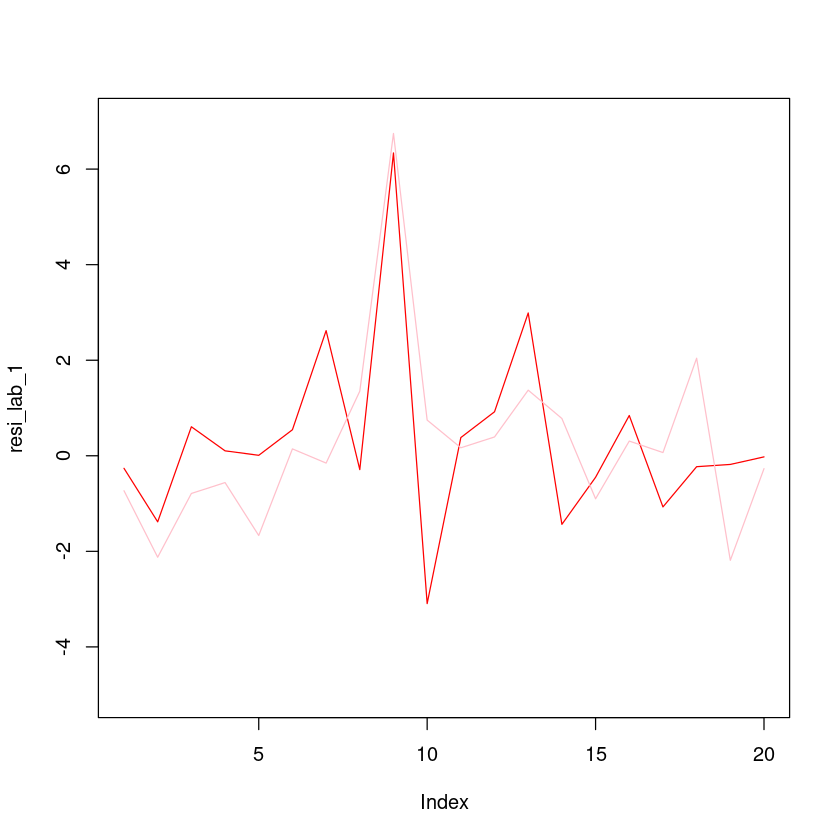

In [114]:
plot(resi_lab_1,type="l",col="red",ylim = c(-5,7))
lines(resi_lab_1_all,col="pink")

У насшому випадку дві моделі з минулої лабораторної майже ідентичні, але трішки краще модель, що має всі регресори в собі

Знайдемо коефіцієнти нашої моделі з значущими коефіцієнтами  відносно початкових змінних. Для цього перемножимо матрицю з коефіцієнтами компонент на прогноз головних компонент

In [94]:
loadings(PC_2)


Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
amgn  0.444  0.113  0.161  0.426         0.692         0.285       
amp         -0.538                       0.145  0.176 -0.314  0.744
amt   0.457  0.184  0.227               -0.120  0.345 -0.730 -0.189
amzn -0.236 -0.425 -0.343  0.248 -0.408  0.232  0.350        -0.487
an    0.385 -0.148 -0.513 -0.504  0.201  0.316 -0.336 -0.155 -0.189
anf   0.438         0.108 -0.337 -0.714 -0.163         0.335  0.146
aon   0.221 -0.438  0.203  0.445        -0.222 -0.657 -0.121 -0.134
apa  -0.166 -0.370  0.688 -0.432  0.160  0.264               -0.278
apc   0.346 -0.351 -0.111         0.491 -0.432  0.408  0.361 -0.124

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.111  0.111  0.111  0.111  0.111  0.111  0.111  0.111  0.111
Cumulative Var  0.111  0.222  0.333  0.444  0.556  0.667  0.778  0.889  1.

У створенні головних компонент повпливати всі початкові регресори. Давайте знайдемо коефіцієнти відносно початкових змінних

In [76]:
l <- PC_2$loadings
loads <- data.frame(matrix(as.numeric(l), attributes(l)$dim, dimnames=attributes(l)$dimnames))[,1:2]
loads

k <- model_2_signif$coefficients
k

,Comp.1,Comp.2
,<dbl>,<dbl>
amgn,0.44440974,0.1132310
amp,-0.03884292,-0.5381928
amt,0.45749689,0.1841885
amzn,-0.23557786,-0.4248880
an,0.38515164,-0.1482235
anf,0.43766537,-0.0951042
aon,0.22064360,-0.4382439
apa,-0.16637433,-0.3695673
apc,0.34631502,-0.3513109


(Intercept)       first      second 
 93.2314720  -0.2392569  -0.8737859

In [84]:
result <- loads*k[2:3]
resulted <- data.frame(rowSums(result))

alpha <- data.frame(model_2_signif$coefficients[1])
names(alpha)<- c('rowSums.result.')
resulted2 <- rbind(resulted,alpha)

resulted2

,rowSums.result.
,<dbl>
amgn,-0.20526771
amp,0.16270671
amt,-0.27040055
amzn,0.30750200
an,0.03736548
anf,-0.35967151
aon,0.33014084
apa,0.23379707
apc,0.22411226


In [86]:
0.44440974*-0.239256860082548+0.1132310*-0.873785938623814

[1] -0.2052677

Перевірка пройшла успішно 

Також давайте подивимось на коефіцієнти з моделі з першої лабораторної. Оскільки наша найкраща модель містила лише один регресор, то використаємо іншу модель

In [88]:
model_all <-lm(tomorrow_apd~.-tomorrow_apd-apd,data=df[(number_rows-50):number_rows,])
summary(model_all)


Call:
lm(formula = tomorrow_apd ~ . - tomorrow_apd - apd, data = df[(number_rows - 
    50):number_rows, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4701 -0.9844 -0.2693  1.2882  6.7459 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 94.76930   28.01091   3.383 0.001586 ** 
amgn         0.50324    0.14089   3.572 0.000923 ***
amp          1.93001    0.44679   4.320 9.68e-05 ***
amt         -0.14082    0.20870  -0.675 0.503606    
amzn        -0.07957    0.04901  -1.623 0.112171    
an          -0.15408    0.41761  -0.369 0.714062    
anf         -0.10216    0.32151  -0.318 0.752286    
aon         -1.36207    0.57489  -2.369 0.022615 *  
apa         -0.15864    0.23441  -0.677 0.502359    
apc         -0.70754    0.31802  -2.225 0.031656 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.926 on 41 degrees of freedom
Multiple R-squared:  0.8955,	Adjusted R-squared:  0.8725 
F-statistic: 39.0

In [98]:
resulted2
resulted_lab_1 <- data.frame(model_all$coefficients)
resulted_lab_1

,rowSums.result.
,<dbl>
amgn,-0.20526771
amp,0.16270671
amt,-0.27040055
amzn,0.30750200
an,0.03736548
anf,-0.35967151
aon,0.33014084
apa,0.23379707
apc,0.22411226


,model_all.coefficients
,<dbl>
(Intercept),94.76930315
amgn,0.50323846
amp,1.93000958
amt,-0.14082425
amzn,-0.07956594
an,-0.15407999
anf,-0.10216178
aon,-1.36206526
apa,-0.15863837


Наскільки ми бачимо різниця коефіцієнтів у нашому випадку доволі суттєва. Єдина що залишається +- сталим , так це кофієент Intercept. 

## Висновок

Модель, що ми пробували цього разу обєктивно справилась гірше. І це пояснюється одним ключовим фактором. Модель з лабораторної 1 тренувалась на всьому обєму даних, а моделі через PCA ні. Обєм дисперсії різниця в цих двух регресіях на 10 відсотків.

Зокрема нам навіть і не варто було використовувати PCA регресію, адже кількість регресорів у нас доволі мінімальна. Також обєм даних, що у нас є не повинен займати довго часу для побудови регресорів, тому використання її для наших цілей недоцільне